# Week1 day4 B

## Plot Gassians with python

Recall that the standard devation (SD) is the square root of the variance. it is a fact that about 0.68 of the probability mass of a Gassian is within 1 SD(either side) of the mean, about 0.95 is within 2 SDs of the mean, and over 0.99 is within 3 SDs of the mean. Thus plotting a Gaussian for x ranging from $\mu-3\sigma$ to $\mu + 3\sigma$ captures over 99% of the probability mass, and we take these as the ranges for the plot.

### Before you start

#### **hint** spaced numbers over a specified interval

In [1]:
import numpy as np
mu = 0
sigma = 1
x = np.linspace(mu-3*sigma, mu+3*sigma, 5)
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

#### **hint** meshgrid: coordinate matrices from coordinate vectors.

In [2]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
print(xv)
print(yv)


[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]


#### **hint** plot contour

In [3]:
import matplotlib.pyplot as plt

(1, 3)
(4, 1)
(4, 3)


/tmp/ipykernel_28913/154215824.py:5: RuntimeWarning: invalid value encountered in true_divide
  z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)


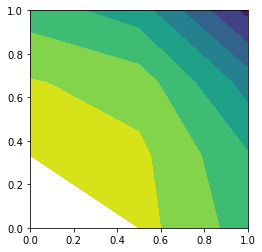

In [4]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)
print(xv.shape)
print(yv.shape)
print(z.shape)
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

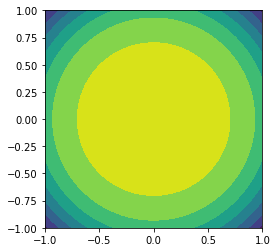

In [5]:
Nx, Ny = (100, 100)
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)

h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

### **Task:** compute multi_gausstion

In [19]:
import numpy as np
import matplotlib.pyplot as plt

The multivariate Gaussian distribution of an n-dimensional vector

$x=(x_1,...,x_D)^T$ 

$\begin{equation*}
    p(x|\mu, \Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))
\end{equation*}   $

$\Sigma$ is the D×D covariance matrix,$\mu=(\mu_1,...,\mu_D)^T$

visualize the magnitude of $p(x|\mu, \Sigma)$ as a function of all the D dimensions requires a plot in D+1 dimensions

In [20]:
def multi_gaussian(grid, mu, Sigma):
    """
    Return the multivariate Gaussian distribution on grid.
    grid is an array of variables (x_1, x_2, x_3, ..., x_k) constructed by packing them into a meshgrid
    """
    # TODO
#     print(grid.shape)
     # dimension of variables
    D = mu.shape[0] # dimension of variables
    det_Sigma = np.linalg.det(Sigma)# determinant of Covariance matrix
    inv_Sigma = np.linalg.inv(Sigma)# invert of the Convariance matrix
    denominator = np.sqrt((2*np.pi)**D * det_Sigma) # the denominator
    # T calculates (x-mu)^T.Sigma^-1.(x-mu) 
    
    # ============== METHOD 1: ====================
    temp1 = grid-mu
    temp2 = inv_Sigma    
    numerator = np.zeros((grid.shape[0], grid.shape[1]))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            numerator[i,j] = np.dot(np.dot(temp1[i,j].ravel(), temp2),temp1[i,j].ravel())
            
    # ============== METHOD 2: ====================
#     numerator = np.einsum('...k,kl,...l->...', grid-mu, inv_Sigma, grid-mu)
#     print(numerator.shape)
    return np.exp(-numerator / 2) / denominator


### **Task:** Plot 2-dimensional Gaussian with different mean and covariance


1. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right]$, $ \mu = (0,0)^T$

In [22]:
import math
from matplotlib import cm

notice that x ranging from $\mu-3\sigma$ to $\mu + 3\sigma$ captures over 99% of the probability mass

/tmp/ipykernel_28913/4008103885.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


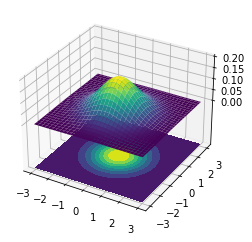

In [23]:
# TODO

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  1]])
N = 60 # number of points
x_range_l = mu[0] - 3 * math.sqrt(Sigma[0,0])
x_range_r = mu[0] + 3 * math.sqrt(Sigma[0,0])
y_range_l = mu[0] - 3 * math.sqrt(Sigma[1,1])
y_range_r = mu[0] + 3 * math.sqrt(Sigma[1,1])
X = np.linspace(x_range_l, x_range_r, N)
Y = np.linspace(y_range_l, y_range_r, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X,Y))
# probabilities
Z = multi_gaussian(pos, mu, Sigma)

# Create a surface plot and projected contour plot under it
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=1, antialiased=True,cmap=cm.viridis)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.viridis)

# Adjust the limits, ticks 
ax.set_zlim(-0.2,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
plt.show()

### <span style="color:red">* We have to use the code above several times, so that we create a function</span>

In [16]:
def plt_mul_Gaussian(mu, Sigma, N=60):
    x_range_l = mu[0] - 3 * math.sqrt(Sigma[0,0])
    x_range_r = mu[0] + 3 * math.sqrt(Sigma[0,0])
    y_range_l = mu[0] - 3 * math.sqrt(Sigma[1,1])
    y_range_r = mu[0] + 3 * math.sqrt(Sigma[1,1])
    X = np.linspace(x_range_l, x_range_r, N)
    Y = np.linspace(y_range_l, y_range_r, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X,Y))
    Z = multi_gaussian(pos, mu, Sigma)

    # Create a surface plot and projected contour plot under it
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=1, antialiased=True,cmap=cm.viridis)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.viridis)

    # Adjust the limits, ticks 
    ax.set_zlim(-0.2,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    plt.show()

2. 
$\Sigma = \left[\begin{array}{cc}
    1 & -1 \\
    -1 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


/tmp/ipykernel_28913/463946738.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


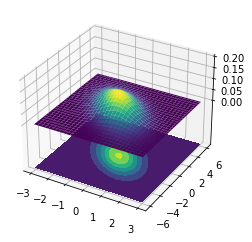

In [17]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -1], [-1,  4]])
plt_mul_Gaussian(mu, Sigma)

3. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


/tmp/ipykernel_28913/463946738.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


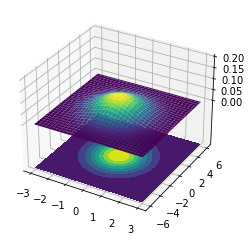

In [18]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  4]])
plt_mul_Gaussian(mu, Sigma)